In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [14]:
# prepare the variables in root file
bNames = """xval,yval,zval""".split(",")
print(type(bNames), bNames)


rtFile = uproot.open("testFile_rootPython.root")
print(rtFile.keys())
rtTree = rtFile["testTree"]
print(rtTree, rtTree.keys())


<class 'list'> ['xval', 'yval', 'zval']
[b'testTree;1']
<TTree b'testTree' at 0x00010dae1a50> [b'xval', b'yval', b'zval']


In [15]:
rtData = rtTree.arrays(bNames)
print(rtData, type(rtData))

{b'xval': array([-0.8044583 ,  0.32093155, -0.02548288, ..., -0.06434491,
        0.50570315, -1.6309443 ], dtype=float32), b'yval': array([ 0.9369363 ,  1.7994204 , -1.1131816 , ...,  0.53313774,
        3.6665368 , -1.2286893 ], dtype=float32), b'zval': array([1.23491  , 1.8278158, 1.1134732, ..., 0.5370066, 3.7012467,
       2.0419736], dtype=float32)} <class 'dict'>


In [16]:
# convert the root branches to numpy array: 3 x 10000
npData = []
for brnch in rtData:
    npData.append(rtData[brnch])
    
print(type(npData))
print(npData)


<class 'list'>
[array([-0.8044583 ,  0.32093155, -0.02548288, ..., -0.06434491,
        0.50570315, -1.6309443 ], dtype=float32), array([ 0.9369363 ,  1.7994204 , -1.1131816 , ...,  0.53313774,
        3.6665368 , -1.2286893 ], dtype=float32), array([1.23491  , 1.8278158, 1.1134732, ..., 0.5370066, 3.7012467,
       2.0419736], dtype=float32)]


In [18]:
npData = np.array(npData)
print(type(npData), npData.shape)
print(npData)

npData = npData.T
print(type(npData), npData.shape)
print(npData)

<class 'numpy.ndarray'> (3, 10000)
[[-0.8044583   0.32093155 -0.02548288 ... -0.06434491  0.50570315
  -1.6309443 ]
 [ 0.9369363   1.7994204  -1.1131816  ...  0.53313774  3.6665368
  -1.2286893 ]
 [ 1.23491     1.8278158   1.1134732  ...  0.5370066   3.7012467
   2.0419736 ]]
<class 'numpy.ndarray'> (10000, 3)
[[-0.8044583   0.9369363   1.23491   ]
 [ 0.32093155  1.7994204   1.8278158 ]
 [-0.02548288 -1.1131816   1.1134732 ]
 ...
 [-0.06434491  0.53313774  0.5370066 ]
 [ 0.50570315  3.6665368   3.7012467 ]
 [-1.6309443  -1.2286893   2.0419736 ]]


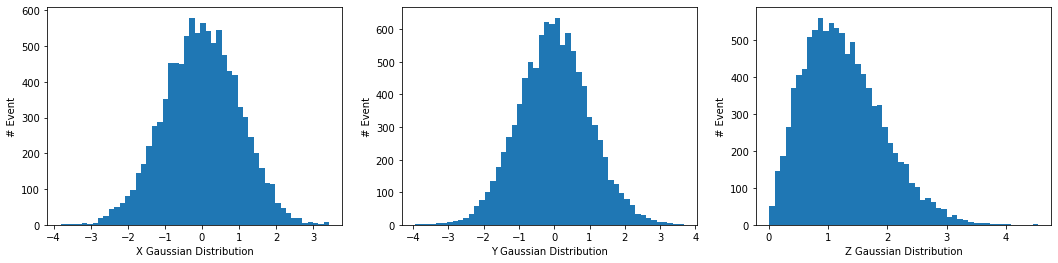

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
axs[0].set_xlabel("X Gaussian Distribution")
axs[0].set_ylabel("# Event")
axs[1].set_xlabel("Y Gaussian Distribution")
axs[1].set_ylabel("# Event")
axs[2].set_xlabel("Z Gaussian Distribution")
axs[2].set_ylabel("# Event")
axs[0].hist(npData[:,0], bins=50)
axs[1].hist(npData[:,1], bins=50)
axs[2].hist(npData[:,2], bins=50)
plt.show()

In [31]:
xmean, xstd = np.mean(npData[:,0]), np.std(npData[:, 0])
ymean, ystd = np.mean(npData[:,1]), np.std(npData[:, 1])
zmean, zstd = np.mean(npData[:,2]), np.std(npData[:, 2])
print("X distribution, mean: %7.4f, deviation: %.2f"%(xmean, xstd))
print("Y distribution, mean: %7.4f, deviation: %.2f"%(ymean, ystd))
print("Z distribution, mean: %7.4f, deviation: %.2f"%(zmean, zstd))

X distribution, mean: -0.0119, deviation: 1.01
Y distribution, mean: -0.0020, deviation: 1.00
Z distribution, mean:  1.2608, deviation: 0.66
